In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
w = [0.18, 0.009, 0.18, 0.009, 0.18]

In [4]:
def generator_data(w ,):
   
    x1 = np.random.randint(1,25)
    x2 = np.random.randint(1,42)
    x3 = np.random.randint(1,12)
    x4 = np.random.randint(1,18)
    x5 = np.random.randint(1,23)
    y = w[0]*x1 + w[1]*x2 + w[2]*x3 + w[3]*x4 + w[4]*x5
    return [y, x1, x2, x3, x4, x5]

In [5]:
res = []
for i in range(1000):
    res.append(generator_data(w))

In [6]:
df = pd.DataFrame(res, columns= ['y', 'x1', 'x2', 'x3', 'x4', 'x5'])
df

,y,x1,x2,x3,x4,x5
0,10.080,24,24,10,16,20
1,9.306,24,5,5,9,22
2,6.003,19,33,2,14,10
3,7.182,6,36,11,2,21
4,5.292,14,19,11,9,3
...,...,...,...,...,...,...
995,5.112,17,3,1,5,10
996,5.400,7,6,10,14,12
997,6.759,12,10,11,1,14
998,5.796,23,15,2,9,6


In [7]:
df.describe()

,y,x1,x2,x3,x4,x5
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,5.790501,12.999000,21.172000,6.15000,8.997000,11.512000
std,1.739786,6.985685,11.523072,3.20933,4.856808,6.238331
min,0.927000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,4.554000,7.000000,11.000000,3.00000,5.000000,6.000000
50%,5.796000,13.000000,21.000000,6.00000,9.000000,11.000000
75%,7.011000,19.000000,31.000000,9.00000,13.000000,17.000000
max,10.593000,24.000000,41.000000,11.00000,17.000000,22.000000


In [8]:
df.y = df.y.round()

In [9]:
df

,y,x1,x2,x3,x4,x5
0,10.0,24,24,10,16,20
1,9.0,24,5,5,9,22
2,6.0,19,33,2,14,10
3,7.0,6,36,11,2,21
4,5.0,14,19,11,9,3
...,...,...,...,...,...,...
995,5.0,17,3,1,5,10
996,5.0,7,6,10,14,12
997,7.0,12,10,11,1,14
998,6.0,23,15,2,9,6


In [10]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse

In [11]:
y =df[["y"]]
x = df[["x1", "x2", "x3", "x4", "x5"]]
print(x.shape)
print(y.shape)

(1000, 5)
(1000, 1)


In [12]:
model=sm.OLS(y,x).fit()

In [13]:
model_summary=model.summary()

In [14]:
print(model_summary)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          8.459e+04
Date:                Wed, 08 Nov 2023   Prob (F-statistic):                        0.00
Time:                        22:35:37   Log-Likelihood:                         -192.52
No. Observations:                1000   AIC:                                      395.0
Df Residuals:                     995   BIC:                                      419.6
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 0)

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(x_train, y_train)

LinearRegression()

In [18]:
pred =lr.predict(x_test)

In [19]:
r2 = r2_score(y_test, pred)
print(r2)
mse = mean_squared_error(y_test, pred)
print(mse)
mae = mean_absolute_error(y_test, pred)
print(mae)

0.9759030111019625
0.07745774666567387
0.23796145388679155


<Axes: >

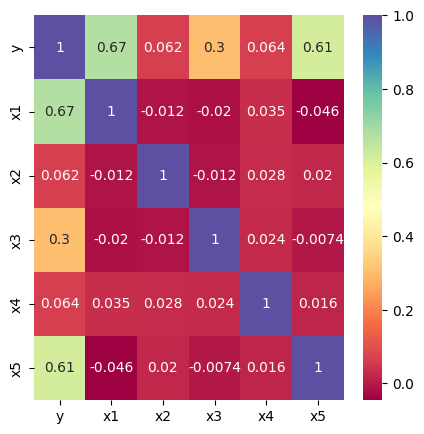

In [20]:
corr_matrix = df.corr()

#Матрица корреляции
plt.figure(figsize=(5,5))

sns.heatmap(corr_matrix,cmap='Spectral', annot = True)

In [21]:
result = {}
result['Linear_Regression'] = [mean_squared_error(y_test, pred), mean_absolute_error(y_test, pred), r2_score(y_test, pred)]
res_df = pd.DataFrame(result, index = ['MAE', 'RMSE', 'R2'])

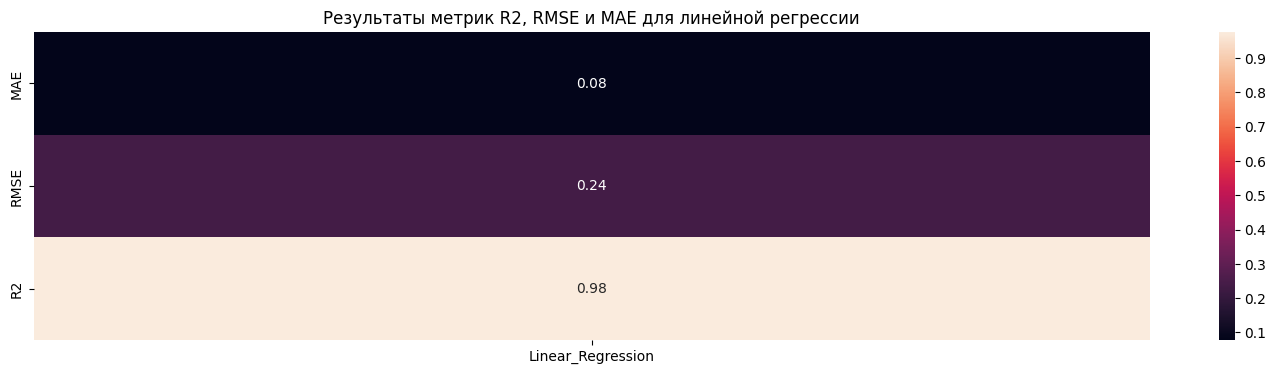

In [22]:
plt.figure(figsize=(18,4))
sns.heatmap(res_df, annot=True, fmt = '.2f')
plt.title('Результаты метрик R2, RMSE и MAE для линейной регрессии')
plt.show()

In [23]:
all_predictions = pd.DataFrame(y_test)
all_predictions['LinearRegression'] =  pred

In [24]:
all_predictions

,y,LinearRegression
993,6.0,6.413782
859,7.0,7.224523
298,11.0,10.612183
553,3.0,2.958568
672,5.0,5.392364
...,...,...
462,5.0,5.021395
356,5.0,5.145160
2,6.0,6.004948
478,7.0,7.090299


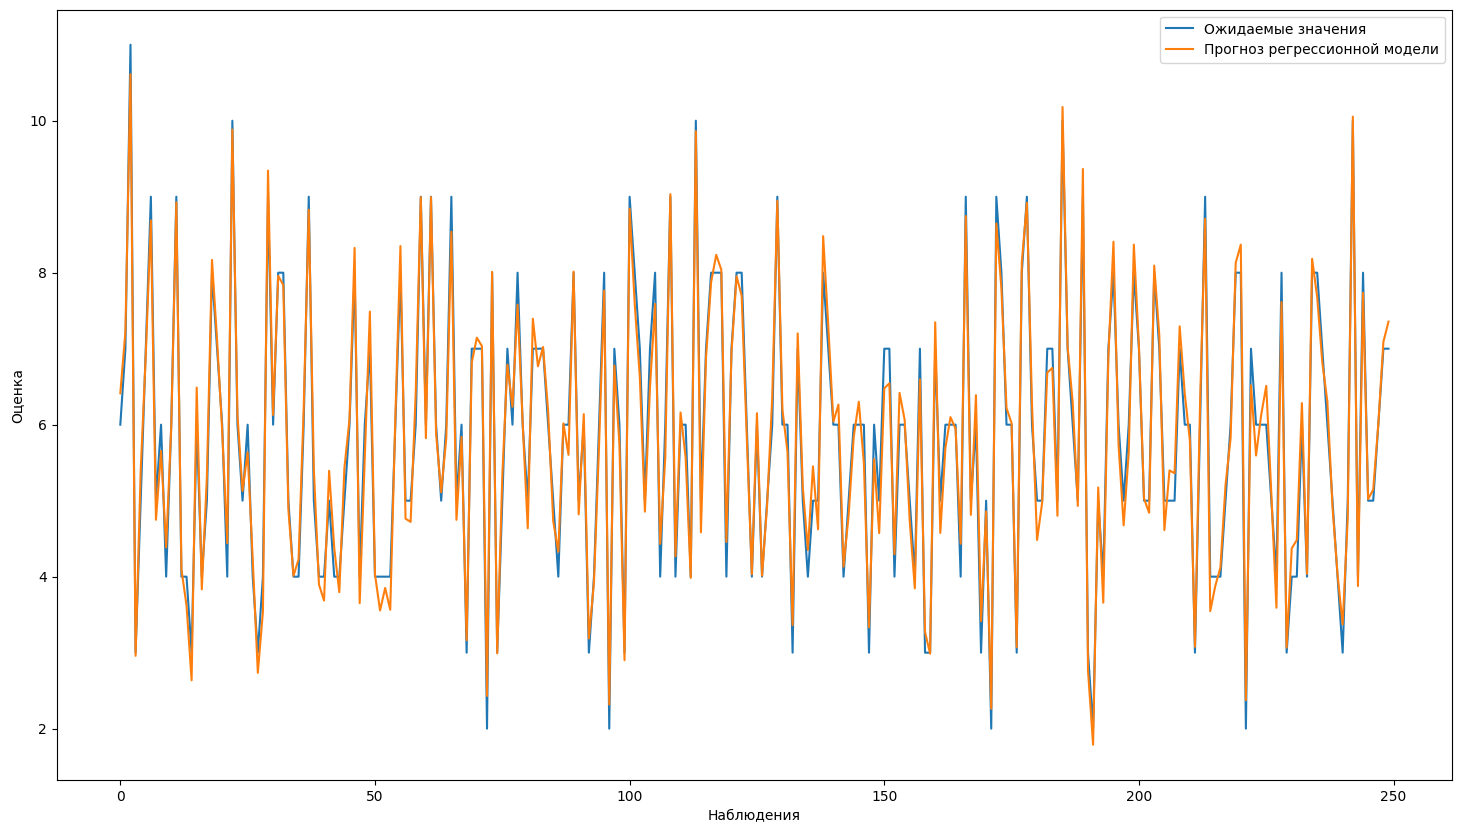

In [31]:
plt.figure(figsize=(18,10))
plt.plot(y_test.values, label = 'Ожидаемые значения')
plt.plot(all_predictions['LinearRegression'].values, label = 'Прогноз регрессионной модели')
plt.xlabel('Наблюдения')
plt.ylabel('Оценка')
plt.ticklabel_format(style='plain')
plt.legend()